
# jupyter - activité 3 :  usage de `sympy` 
Sauvegardez et fermez le calepin précédent et créez en un nouveau, donnez lui un nom. 

On commence par importer une bibliothèque de calcul symbolique. La cellule suivante permettra que les dessins soient insérés dans le calepin et non pas créés dans une nouvelle fenêtre. 

In [1]:
from sympy import *

In [2]:
%matplotlib inline

In [3]:
# En décommentant `init_printing()` on affiche les résultats en jsmath :
# c'est certes plus joli mais c'est moins compréhensible...
# init_printing()

Nous créons deux variables symboliques et en profitons pour réviser une identité remarquable :

In [4]:
a,b=Symbol('a'),Symbol('b')
print((a+b)**2)
print(expand((a+b)**2))

(a + b)**2
a**2 + 2*a*b + b**2


On peut développer par `expand`... et factoriser par `factor` : 

In [5]:
factor(a**3-8)

(a - 2)*(a**2 + 2*a + 4)

In [6]:
factor(a**2-3)

a**2 - 3

In [7]:
factor(a**2-3,extension=sqrt(3))

(a - sqrt(3))*(a + sqrt(3))

mais ne rêvons pas : on ne sait que rarement factoriser des expressions, et `sympy` ne sait pas plus qu'un humain factoriser les expressions un peu trop complexes...

### quelques exercices de la feuille de TD1 : polynômes

In [8]:
X = Symbol('X')
# exo 1 : produits de polynômes
for (P,Q) in [(X**3+X**2+X+1,X-1),(X**3-X**2+X-1,X+1),(4*X**3+3*X**2+2*X+1,X**2-2*X+1)] : 
    print("(%s) * (%s)  \n =  %s   \n"%(P,Q,simplify(P*Q)))

(X**3 + X**2 + X + 1) * (X - 1)  
 =  X**4 - 1   

(X**3 - X**2 + X - 1) * (X + 1)  
 =  X**4 - 1   

(4*X**3 + 3*X**2 + 2*X + 1) * (X**2 - 2*X + 1)  
 =  4*X**5 - 5*X**4 + 1   



In [9]:
# exo 2 : divisions euclidiennes
for (A,B) in [(X**3-2*X+1,X+1), (X**5-X**4+2*X**3+X**2+4,X**2-1), (3*X**5+4*X**2+1,X**2+2*X+3),(X**4-X**3+X-2,X**2-2*X+4)] : 
    print("%s divisé par %s : \n quotient %s\n reste    %s\n"%(A,B,pquo(A,B),prem(A,B)))

X**3 - 2*X + 1 divisé par X + 1 : 
 quotient X**2 - X - 1
 reste    2

X**5 - X**4 + 2*X**3 + X**2 + 4 divisé par X**2 - 1 : 
 quotient X**3 - X**2 + 3*X
 reste    3*X + 4

3*X**5 + 4*X**2 + 1 divisé par X**2 + 2*X + 3 : 
 quotient 3*X**3 - 6*X**2 + 3*X + 16
 reste    -41*X - 47

X**4 - X**3 + X - 2 divisé par X**2 - 2*X + 4 : 
 quotient X**2 + X - 2
 reste    -7*X + 6



In [10]:
# exo 3 : factorisations...
for P in [X**4-1,X**3-3,X**4+1,X**4+X**2+1,X**12-1]:
    print( "%s =  %s \n= %s \n"%(P,factor(P),factor(P,extension=[sqrt(2),3**Rational(1,3)]) ))

X**4 - 1 =  (X - 1)*(X + 1)*(X**2 + 1) 
= (X - 1)*(X + 1)*(X**2 + 1) 

X**3 - 3 =  X**3 - 3 
= (X - 3**(1/3))*(X**2 + 3**(1/3)*X + 3**(2/3)) 

X**4 + 1 =  X**4 + 1 
= (X**2 - sqrt(2)*X + 1)*(X**2 + sqrt(2)*X + 1) 

X**4 + X**2 + 1 =  (X**2 - X + 1)*(X**2 + X + 1) 
= (X**2 - X + 1)*(X**2 + X + 1) 

X**12 - 1 =  (X - 1)*(X + 1)*(X**2 + 1)*(X**2 - X + 1)*(X**2 + X + 1)*(X**4 - X**2 + 1) 
= (X - 1)*(X + 1)*(X**2 + 1)*(X**2 - X + 1)*(X**2 + X + 1)*(X**4 - X**2 + 1) 



Pour le dernier calcul, remarquons que le discriminant de $Y^2 - Y + 1$ est $(-1)^2-4\times1\times1=-3$...

In [11]:
factor(X**4 - X**2 + 1,extension=sqrt(3))

(X**2 - sqrt(3)*X + 1)*(X**2 + sqrt(3)*X + 1)

In [12]:
factor(X**12 - 1,extension=sqrt(3))

(X - 1)*(X + 1)*(X**2 + 1)*(X**2 - X + 1)*(X**2 + X + 1)*(X**2 - sqrt(3)*X + 1)*(X**2 + sqrt(3)*X + 1)

Voici comment tracer une courbe de fonction : 

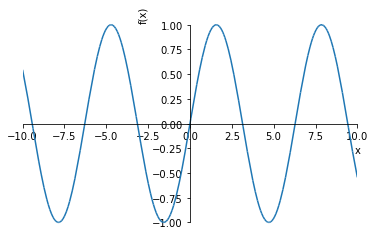

In [13]:
x=Symbol('x')
plot(sin(x))

f(0) = 4
f(1) = 6
f(2) = 10


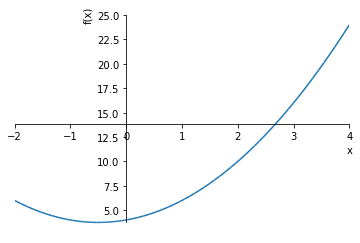

In [14]:
# exo 1 de la feuille de TD 2
f = lambda x : x**2+1*x+4
for i in range(3) : 
    print('f(%s) = %s'%(i,f(i)))
plot(f(x),(x,-2,4))

Dans l'exo 2 de la feuille 2, on calcule un polynôme de Newton : 

$$ n = x \mapsto  4 + 2 x + x \left(x - 1\right) + \frac{-10}{6} x \left(x - 1\right) \left(x - 2\right)   $$

Quelle est sa forme développée ? 

In [15]:
n = lambda x : 4 + 2*x + x*(x-1) + -10/6*x*(x-1)*(x-2)
# n = lambda x : 4 + 2*x + x*(x-1) + Rational(-10,6)*x*(x-1)*(x-2)
x=Symbol('x')
print(n(x))

-1.66666666666667*x*(x - 2)*(x - 1) + x*(x - 1) + 2*x + 4


C'est mieux avec un rationnel - et non un flottant : 

In [16]:
n = lambda x : 4 + 2*x + x*(x-1) + Rational(-10,6)*x*(x-1)*(x-2)
print(n(x))

-5*x*(x - 2)*(x - 1)/3 + x*(x - 1) + 2*x + 4


Voici enfin cette forme développée : 

In [17]:
print(expand(n(x)))

-5*x**3/3 + 6*x**2 - 7*x/3 + 4


Rappelons que cette fonction est connue par ses valeurs en $0$, $1$, $2$ et $3$ : 

In [18]:
for i in range(4): 
    print('n(%s) = %s'%(i,n(i)))

n(0) = 4
n(1) = 6
n(2) = 10
n(3) = 6


## polynômes de Lagrange
Nous allons construire une fonction qui renverra un **polynôme de Lagrange**. 

Rappelons comment un tel polynôme est construit : 
* les paramètres sont deux suites de $n+1$ valeurs $x_i : 0\leq i \leq n$ et $y_i : 0\leq i \leq n$, les abscisses $x_i$ devant être deux à deux distinctes ; 
* notre fonction (informatique) renvoie la fonction (mathématique) $p$ qui est le seul polynôme de degré au plus $n$ qui vérifie pour chque $i$ l'équation $p(x_i)=y_i$, ce polynôme étant obtenu par la formule de calcul : 
    * les $L_i$ forment la base de Lagrange : $$L_i=x\mapsto\prod_{j\in\{0,1\dots n\},j\neq i}(x-x_i)$$
    * le polynôme interpolateur est obtenu par la combinaison linéaire $$p=x \mapsto \sum_{i\in\{0,1\dots n\}} \frac{y_i}{L_i(x_i)}\times L_i(x)$$
    
La signature de notre fonction pourra être 

    def LagrangePoly(xi,yi) : 
    """ En entrée deux listes de n+1 nombres
    Renvoie de poly de Lagrange associé à ces deux listes
    """
Il est prudent de disposer d'un jeu d'essai, par exemple en reprenant l'**exercice 2** de la **feuille de TD 2** : 

On construitra d'abord la base de Lagrange : 
* construire la liste des $n+1$ monomes $x-x_j$ ; 
* construire la liste des $n$ monomes $x-x_j$, sauf le numéro $i$ ;
* construire le produit de ces monômes - qui est noté $L_i(x)$ dans notre cours.

On conclura en construisant alors le polynôme de Taylor. 

In [19]:
from sympy import *
def LagrangeBasis(xi,i):
    return (lambda x : prod([(x-xi[j]) for j in range(len(xi)) if j!=i])) 
    
####
def LagrangePoly(xi,yi) : 
    ### TODO : vérifier que les deux listes xi et yi sont de même taille ???
    return lambda x : sum([sympify(yi[i])/sympify(LagrangeBasis(xi,i)(xi[i]))*LagrangeBasis(xi,i)(x) for i in range(len(xi))])
##################################################
x=Symbol('x') 
xi=[0,1,2]
yi=[4,6,10]
print(">>> >>> Données de l'exo 1, feuille 2 : ")
print(xi)
print(yi)
print('>>> base de Lagrange : ')
for i in range(3) : 
    print(i," :  ", LagrangeBasis(xi,i)(x))
pl1=LagrangePoly([0,1,2],[4,6,10])
print('>>> polynôme de Lagrange : ')
print(pl1(x))
print(expand(pl1(x)))
##################################################
print("\n>>> >>> Données de l'exo 1, feuille 2 : ")
x=Symbol('x')
xi=[0,1,2]
yi=[4,6,10]
print('>>> base de Lagrange : ')
for i in range(3) : 
    print(i," :  ", LagrangeBasis(xi,i)(x))
pl1=LagrangePoly(xi,yi)
print('>>> polynôme de Lagrange : ')
print(pl1(x))
print(expand(pl1(x)))
##################################################
print("\n>>> >>> Données de l'exo 2, feuille 2 : ")
x=Symbol('x')
xi=[0,1,2,3]
yi=[4,6,10,6]
print('>>> base de Lagrange : ')
for i in range(4) : 
    print(i," :  ", LagrangeBasis(xi,i)(x))
pl2=LagrangePoly(xi,yi)
print('>>> polynôme de Lagrange : ')
print(pl2(x))
print(expand(pl2(x)))

>>> >>> Données de l'exo 1, feuille 2 : 
[0, 1, 2]
[4, 6, 10]
>>> base de Lagrange : 
0  :   (x - 2)*(x - 1)
1  :   x*(x - 2)
2  :   x*(x - 1)
>>> polynôme de Lagrange : 
-6*x*(x - 2) + 5*x*(x - 1) + 2*(x - 2)*(x - 1)
x**2 + x + 4

>>> >>> Données de l'exo 1, feuille 2 : 
>>> base de Lagrange : 
0  :   (x - 2)*(x - 1)
1  :   x*(x - 2)
2  :   x*(x - 1)
>>> polynôme de Lagrange : 
-6*x*(x - 2) + 5*x*(x - 1) + 2*(x - 2)*(x - 1)
x**2 + x + 4

>>> >>> Données de l'exo 2, feuille 2 : 
>>> base de Lagrange : 
0  :   (x - 3)*(x - 2)*(x - 1)
1  :   x*(x - 3)*(x - 2)
2  :   x*(x - 3)*(x - 1)
3  :   x*(x - 2)*(x - 1)
>>> polynôme de Lagrange : 
3*x*(x - 3)*(x - 2) - 5*x*(x - 3)*(x - 1) + x*(x - 2)*(x - 1) - 2*(x - 3)*(x - 2)*(x - 1)/3
-5*x**3/3 + 6*x**2 - 7*x/3 + 4


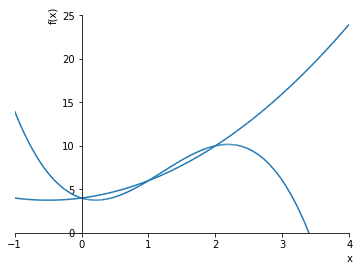

In [20]:
dessin=plot(pl1(x),pl2(x),(x,-1,4),ylim=(0,25))

Reprendre les calcules de la feuille 2 sur les polynômes de Lagrange. 

In [21]:
## exo 4 feuille 2 :
def polyInterpolateur(xi,f) : 
    return LagrangePoly(xi,[f(_) for _ in xi])
###########
print("="*50)
########### 
xi=[-1,1]
f=lambda x : 1
x=Symbol('x')
pl1=polyInterpolateur(xi,f)
print(pl1(x))
###########
print("="*50)
########### 
xi=[1,-1,2,-2]
f=lambda x : x+3
x=Symbol('x')
pl2=polyInterpolateur(xi,f)
print(pl2(x))
print(expand(pl2(x)))
###########
print("="*50)
########### 
xi=[1,-1,2,-2]
f=lambda x : x**3+3
x=Symbol('x')
pl3=polyInterpolateur(xi,f)
#print(pl3(x))
#print(expand(pl3(x)))
###########
print("="*50)
########### 




1
-(x - 2)*(x - 1)*(x + 1)/12 + (x - 2)*(x - 1)*(x + 2)/3 - 2*(x - 2)*(x + 1)*(x + 2)/3 + 5*(x - 1)*(x + 1)*(x + 2)/12
x + 3


## polynômes de Newton 

In [22]:
def NewtonBasis(début,pas,i):
    return (lambda x : prod([ (x-(début+j*pas)) for j in range(i) ])) 
    ###
print('>>> base de Newton : ')
for i in range(4) : 
    print(i," :  ", NewtonBasis(0,1,i)(x))
###
print('>>> base de Newton : ')
for i in range(6) : 
    print(i," :  ", NewtonBasis(1,2,i)(x))
####
def NewtonDelta(yi) : 
    Delta0=[]
    while len(yi)>0 : 
        print(yi)
        Delta0.append(yi[0])
        Deltayi=[yi[i+1]-yi[i] for i in range(len(yi)-1)]
        yi=Deltayi[:]
    return Delta0
NewtonDelta([4,6,10,6])
### 
def NewtonPoly(début,pas,yi) : 
    Delta0=NewtonDelta(yi)
    return lambda x : sum([ Rational(1,factorial(i))/pas**i*Delta0[i]*NewtonBasis(début,pas,i)(x) for i in range(len(yi))  ])
début,pas,yi=0,1,[4,6,8,12]
pn2=NewtonPoly(début,pas,yi)
print(pn2(x))
print(expand(pn2(x)))
for i in range(len(yi)) : 
    print (i,début+i*pas,pn2(début+i*pas),yi[i])
début,pas=3,2
pn2=NewtonPoly(début,pas,yi)
print(pn2(x))
print(expand(pn2(x)))
for i in range(len(yi)) : 
    print (i,début+i*pas,pn2(début+i*pas),yi[i])



>>> base de Newton : 
0  :   1
1  :   x
2  :   x*(x - 1)
3  :   x*(x - 2)*(x - 1)
>>> base de Newton : 
0  :   1
1  :   x - 1
2  :   (x - 3)*(x - 1)
3  :   (x - 5)*(x - 3)*(x - 1)
4  :   (x - 7)*(x - 5)*(x - 3)*(x - 1)
5  :   (x - 9)*(x - 7)*(x - 5)*(x - 3)*(x - 1)
[4, 6, 10, 6]
[2, 4, -4]
[2, -8]
[-10]
[4, 6, 8, 12]
[2, 2, 4]
[0, 2]
[2]
x*(x - 2)*(x - 1)/3 + 2*x + 4
x**3/3 - x**2 + 8*x/3 + 4
0 0 4 4
1 1 6 6
2 2 8 8
3 3 12 12
[4, 6, 8, 12]
[2, 2, 4]
[0, 2]
[2]
x + (x - 7)*(x - 5)*(x - 3)/24 + 1
x**3/24 - 5*x**2/8 + 95*x/24 - 27/8
0 3 4 4
1 5 6 6
2 7 8 8
3 9 12 12


In [23]:
##exo3 coureur à pied
A=Matrix(3,3,[1,1,1,4,2,1,9,3,1])
B=Matrix(3,1,[60,130,250])
print(A.inv()*B)

Matrix([[25], [-5], [40]])


[60, 130, 250]
[70, 120]
[50]
7*x/50 + (x - 1000)*(x - 500)/10000 - 10
x**2/10000 - x/100 + 40
420
[60, 130, 250, 350]
[70, 120, 100]
[50, -20]
[-70]
7*x/50 - 7*(x - 1500)*(x - 1000)*(x - 500)/75000000 + (x - 1000)*(x - 500)/10000 - 10
-7*x**3/75000000 + 19*x**2/50000 - 4*x/15 + 110
350


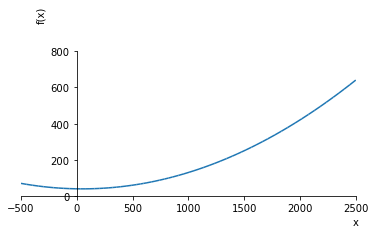

In [24]:
##exo 3 coureur à pied
pn1=NewtonPoly(500,500,[60,130,250])
print(pn1(x))
print(expand(pn1(x)))
print(pn1(2000))
######
pn2=NewtonPoly(500,500,[60,130,250,350])
print(pn2(x))
print(expand(pn2(x)))
print(pn2(2000))
######
plot(pn1(x),(x,-500,2500),ylim=(-200,1000))

[60, 130, 250]
[70, 120]
[50]
70*x + 25*(x - 2)*(x - 1) - 10
25*x**2 - 5*x + 40
420
[60, 130, 250, 350]
[70, 120, 100]
[50, -20]
[-70]
70*x - 35*(x - 3)*(x - 2)*(x - 1)/3 + 25*(x - 2)*(x - 1) - 10
-35*x**3/3 + 95*x**2 - 400*x/3 + 110
350
[0, 60, 130, 250, 350]
[60, 70, 120, 100]
[10, 50, -20]
[40, -70]
[-110]
-55*x*(x - 3)*(x - 2)*(x - 1)/12 + 20*x*(x - 2)*(x - 1)/3 + 5*x*(x - 1) + 60*x
-55*x**4/12 + 205*x**3/6 - 785*x**2/12 + 575*x/6


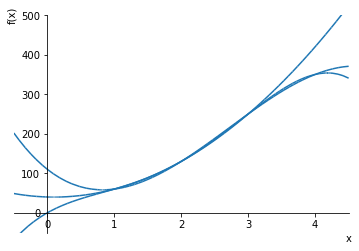

In [25]:
##exo 3 coureur à pied avec changement d'unité 
pn1=NewtonPoly(1,1,[60,130,250])
print(pn1(x))
print(expand(pn1(x)))
print(pn1(4))
######
pn2=NewtonPoly(1,1,[60,130,250,350])
print(pn2(x))
print(expand(pn2(x)))
print(pn2(4))
############
pn3=NewtonPoly(0,1,[0,60,130,250,350])
print(pn3(x))
print(expand(pn3(x)))
############
plot(pn1(x),pn2(x),pn3(x),(x,-0.5,4.5),ylim=(-50,500))

In [ ]:
from sympy import symbols
from sympy.plotting import plot
x = symbols('x')
p1 = plot(x*x)
p2 = plot(x)
p1.extend(p2)
p1.show()

In [ ]:
p1 = plot(x*x)
p2 = plot(x)
p1.show()

In [ ]:
plot?